In [74]:
import pandas as pd
from nixtla import NixtlaClient

import sys
sys.path.append('/home/sedroc/Bachelor/FEPCEU')
from data.data_retriever import Dataretreiver

In [75]:
API_KEY="nixak-dYY7rbjTvFo81RJJ8piW8yH7TWzZ5Ey0dnzleZE0O6pDkEBIEFd93iA5kBWK4QcgOL1eR3Asfnji6Zzj"

In [76]:
data = Dataretreiver(reduce=None, debug=True)
df = data.combined
df.rename(columns={'price':'y'}, inplace=True)
df['ds'] = df.index
df['unique_id'] = 0
df.head()

/home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:155: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').ffill()
/home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:156: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:165: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')
/home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').ffill()
/home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
 

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784


/home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:198: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').ffill()


,sun_area_1,sun_area_10,sun_area_11,sun_area_12,sun_area_13,sun_area_14,sun_area_15,sun_area_16,sun_area_17,sun_area_18,...,temp_area_4,temp_area_40,temp_area_5,temp_area_6,temp_area_7,temp_area_8,temp_area_9,y,ds,unique_id
2024-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.5,0.8,5.1,6.9,6.3,6.7,6.3,126.660004,2024-01-01 00:00:00,0
2024-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.7,0.8,4.2,7.3,6.4,6.5,6.5,209.779999,2024-01-01 01:00:00,0
2024-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.7,0.7,4.2,7.1,6.5,6.3,6.6,198.740005,2024-01-01 02:00:00,0
2024-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.4,0.8,4.4,7.2,6.4,6.1,6.6,30.860001,2024-01-01 03:00:00,0
2024-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.4,0.3,4.4,7.1,6.5,6.1,6.5,-0.220000,2024-01-01 04:00:00,0


In [77]:
# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = API_KEY)

In [84]:
test_df = df.tail(144) # 3 days = (144 * 0.5h *  1 day/24h) 
train_df = df.iloc[:-144] # 25 days = (1200 *0.5h * 1 day/24h)

In [91]:
train_df.tail()

,sun_area_1,sun_area_10,sun_area_11,sun_area_12,sun_area_13,sun_area_14,sun_area_15,sun_area_16,sun_area_17,sun_area_18,...,temp_area_4,temp_area_40,temp_area_5,temp_area_6,temp_area_7,temp_area_8,temp_area_9,y,ds,unique_id
2024-12-21 11:00:00,0.01,0.0,0.01,0.0,0.0,0.01,0.0,0.01,0.01,0.0,...,8.8,5.3,7.35,8.5,8.5,8.4,8.8,230.699997,2024-12-21 11:00:00,0
2024-12-21 12:00:00,0.01,0.0,0.01,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,8.8,5.3,7.46,8.4,8.3,8.3,8.7,232.190002,2024-12-21 12:00:00,0
2024-12-21 13:00:00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,9.0,5.1,7.56,8.4,8.2,8.3,8.7,222.570007,2024-12-21 13:00:00,0
2024-12-21 14:00:00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,9.1,4.8,7.67,8.5,8.3,8.4,8.9,193.389999,2024-12-21 14:00:00,0
2024-12-21 15:00:00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,9.3,4.7,7.77,8.5,8.5,8.5,9.1,203.539993,2024-12-21 15:00:00,0


In [90]:
test_df.head()

,sun_area_1,sun_area_10,sun_area_11,sun_area_12,sun_area_13,sun_area_14,sun_area_15,sun_area_16,sun_area_17,sun_area_18,...,temp_area_4,temp_area_40,temp_area_5,temp_area_6,temp_area_7,temp_area_8,temp_area_9,y,ds,unique_id
2024-12-21 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.3,4.8,7.88,8.6,8.7,8.8,9.3,218.690002,2024-12-21 16:00:00,0
2024-12-21 17:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.4,4.9,7.98,8.7,8.7,8.9,9.4,218.389999,2024-12-21 17:00:00,0
2024-12-21 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.3,5.1,8.09,9.0,8.8,8.9,9.3,208.539993,2024-12-21 18:00:00,0
2024-12-21 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.1,4.7,8.19,9.0,9.2,9.1,9.3,154.669998,2024-12-21 19:00:00,0
2024-12-21 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.9,4.6,8.30,9.1,9.1,9.0,9.1,114.160004,2024-12-21 20:00:00,0


In [85]:
predict_df = nixtla_client.forecast(
    df=train_df,
    h=144,
    level=[90],  # Generate a 90% confidence interval
    finetune_steps=60,  # Specify the number of steps for fine-tuning
    finetune_loss="mae",  # Use the MAE as the loss function for fine-tuning
    model="timegpt-1-long-horizon",  # Use the model for long-horizon forecasting
    time_col="ds",
    target_col="y",
    id_col='unique_id'
)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: h
/home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/nixtla/nixtla_client.py:383: UserWarning: `df` contains the following exogenous features: ['sun_area_1', 'sun_area_10', 'sun_area_11', 'sun_area_12', 'sun_area_13', 'sun_area_14', 'sun_area_15', 'sun_area_16', 'sun_area_17', 'sun_area_18', 'sun_area_19', 'sun_area_2', 'sun_area_20', 'sun_area_21', 'sun_area_22', 'sun_area_23', 'sun_area_24', 'sun_area_25', 'sun_area_26', 'sun_area_27', 'sun_area_28', 'sun_area_29', 'sun_area_3', 'sun_area_30', 'sun_area_31', 'sun_area_32', 'sun_area_33', 'sun_area_34', 'sun_area_35', 'sun_area_36', 'sun_area_37', 'sun_area_38', 'sun_area_39', 'sun_area_4', 'sun_area_40', 'sun_area_5', 'sun_area_6', 'sun_area_7', 'sun_area_8', 'sun_area_9', 'wind_area_1', 'wind_area_10', 'wind_area_11', 'wind_area_12', 'wind_area_13', 'wind_area_14', 'wind_area_15', 'wind_area_16', 'wind_area_17', 'wind_area_18', 'wind

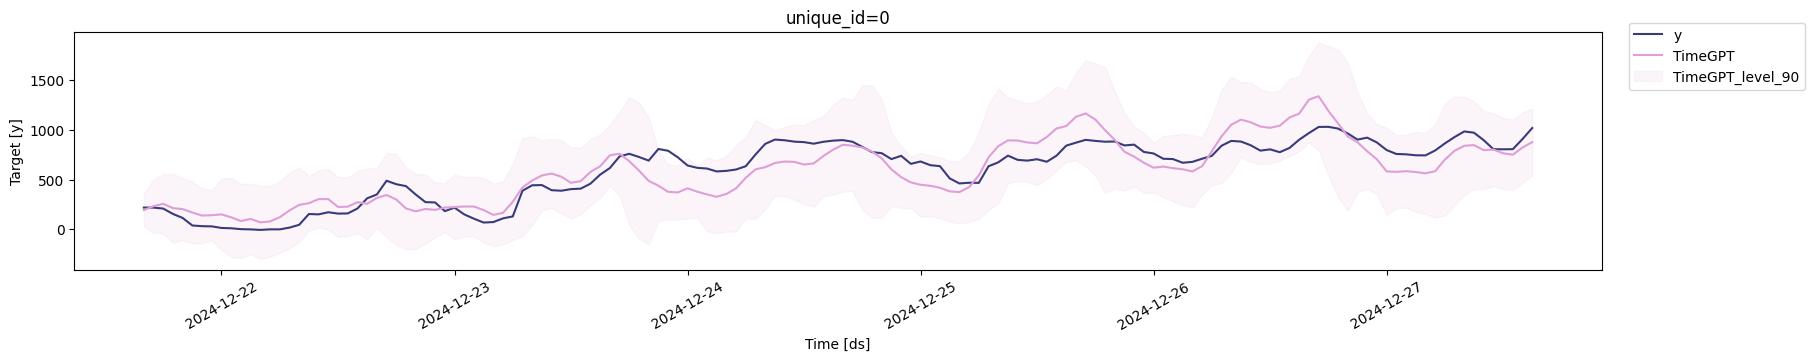

In [86]:
nixtla_client.plot(
    test_df, predict_df, models=["TimeGPT"], level=[90], time_col="ds", target_col="y"
)

In [82]:
predict_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-90,TimeGPT-lo-90
0,0,2024-12-21 16:00:00,247.99731,326.39820,169.59644
1,0,2024-12-21 17:00:00,267.52908,369.94710,165.11105
2,0,2024-12-21 18:00:00,283.55692,407.53015,159.58370
3,0,2024-12-21 19:00:00,285.27957,349.37213,221.18700
4,0,2024-12-21 20:00:00,232.80704,269.76210,195.85196


In [87]:
from sklearn.metrics import (
    root_mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error, 
    r2_score
)
mean_absolute_error(test_df['y'], predict_df['TimeGPT'])

138.7358466388889

In [81]:
from utilsforecast.losses import mae, rmse, smape
from utilsforecast.evaluation import evaluate

predict_df["ds"] = pd.to_datetime(predict_df["ds"])
test_df = pd.merge(test_df, predict_df, "left", ["ds"])
evaluation = evaluate(
    test_df,
    metrics=[mae, rmse, smape],
    models=["TimeGPT"],
    target_col="y",
    id_col="unique_id"
)

average_metrics = evaluation.groupby("metric")["TimeGPT"].mean()
average_metrics

KeyError: 'unique_id'